In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import cv2
from scipy.fftpack import dct, idct



In [2]:

def dct_1d(image: np.array) -> np.array:
    N = len(image)
    result = np.zeros(N)
    sqrt_1_N = np.sqrt(1 / N)
    sqrt_2_N = np.sqrt(2 / N)
    
    for u in range(N):
        cos_vals = np.cos(np.pi * u * (2 * np.arange(N) + 1) / (2 * N))
        val = np.dot(image, cos_vals)
        result[u] = val * (sqrt_1_N if u == 0 else sqrt_2_N)
    
    return result

def inv_dct_1d(dct: np.array) -> np.array:
    N = len(dct)
    res = np.zeros(N)
    sqrt_1_N = np.sqrt(1 / N)
    sqrt_2_N = np.sqrt(2 / N)
    
    cos_vals = np.array([np.cos(np.pi * i * (2 * np.arange(N) + 1) / (2 * N)) for i in range(N)])
    
    for u in range(N):
        val = sqrt_1_N * dct[0] + sqrt_2_N * np.dot(dct[1:], cos_vals[1:, u])
        res[u] = val
    
    return res


In [3]:
#**************** 2D DCT************** using seperables
# dct on 2D
def dct_2d(input:np.array)->np.array:
    dct_on_row = np.apply_along_axis(func1d=dct_1d,axis=1,arr=input)
    print("row_done")
    final = np.apply_along_axis(func1d=dct_1d,axis=0,arr=dct_on_row)
    return final
# inv dct on 2d
def inv_dct_2d(input:np.array)->np.array:
    inv1 = np.apply_along_axis(func1d=inv_dct_1d,axis=0,arr=input)
    final = np.apply_along_axis(func1d=inv_dct_1d,axis=1,arr=inv1)
    return final



In [4]:

flower = cv2.imread("data/flower.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)
flower_dct =dct_2d(flower)

row_done


In [5]:
dct_built_in = dct(x=flower,axis=1,norm='ortho')
dct_built_in = dct(x=dct_built_in,axis=0,norm='ortho')

In [6]:
RMSE = np.average(np.square(np.abs(flower_dct-dct_built_in)).flatten())
print("MSE between DCT of library and my implementation",RMSE)

MSE between DCT of library and my implementation 4.1947721520219777e-10


In [7]:
T=inv_dct_2d(flower_dct)

In [8]:
absolute_error = np.sum(np.abs(T-flower))
print("sum of absolute_error between original image t and f =",absolute_error)



sum of absolute_error between original image t and f = 3.001083364040369e-06


In [9]:
#************ in bulit ***************************
C2 = T.astype(np.uint8)
C1 = flower.astype(np.uint8)

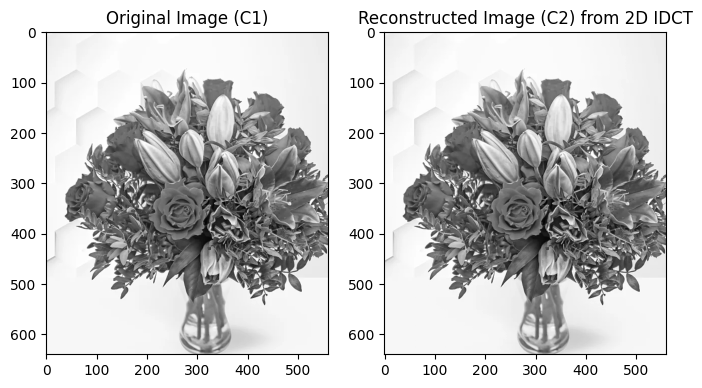

In [10]:
plt.figure(figsize=(8, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(C1, cmap='gray')
plt.title("Original Image (C1)")
plt.axis('on')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(C2, cmap='gray')
plt.title("Reconstructed Image (C2) from 2D IDCT")
plt.axis('on')

plt.savefig("output_images/Q1/Reconstructed_image_from_2DCT.png")
plt.show()


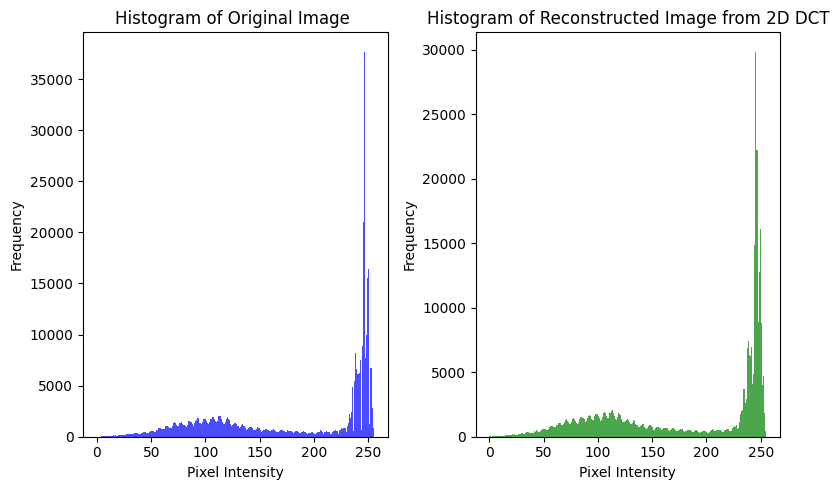

In [11]:
plt.figure(figsize=(8, 5))

# Histogram for Original Image (C1)
plt.subplot(1, 2, 1)
plt.hist(C1.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Histogram of Original Image ")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram for Reconstructed Image (C2)
plt.subplot(1, 2, 2)
plt.hist(C2.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title("Histogram of Reconstructed Image from 2D DCT")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("output_images/Q1/Histogram.png")
plt.show()


In [13]:

from scipy.fftpack import dct, idct

flower = cv2.imread("data/flower.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)

# flower_dct = dct(flower, axis=0, norm='ortho')
# flower_dct = dct(flower_dct, axis=1, norm='ortho')
flower_dct = dct_2d(flower)

flower_flattened = flower_dct.flatten()
N = flower_flattened.size
threshold = int(N / 16)

sorted_indices = np.argsort(np.abs(flower_flattened))[::-1]

thresholded_dct = np.zeros_like(flower_flattened)
thresholded_dct[sorted_indices[:threshold]] = flower_flattened[sorted_indices[:threshold]]

thresholded_dct = thresholded_dct.reshape(flower_dct.shape)

# C2 = idct(thresholded_dct, axis=0, norm='ortho')
# C2 = idct(C2, axis=1, norm='ortho').astype(np.uint8)
C2 = inv_dct_2d(thresholded_dct)
C1 = flower.astype(np.uint8)

MSE = np.mean((C1 - C2) ** 2)
print("MSE = ", MSE)

deleted_coeffs = flower_flattened[sorted_indices[threshold:]]
sum_squares_deleted = np.sum(deleted_coeffs ** 2)

M, N = flower.shape

deleted = sum_squares_deleted / (M * N)
print("1/(MN) times the sum of squares of deleted coefficients = ", deleted)
print(flower.shape)

row_done
MSE =  168.7435055969652
1/(MN) times the sum of squares of deleted coefficients =  168.74350559696506
(640, 560)


MSE of top 1/16th for each block :  35.10497767857143
MSE of top 1/16  across all  block :  31.952134486607143


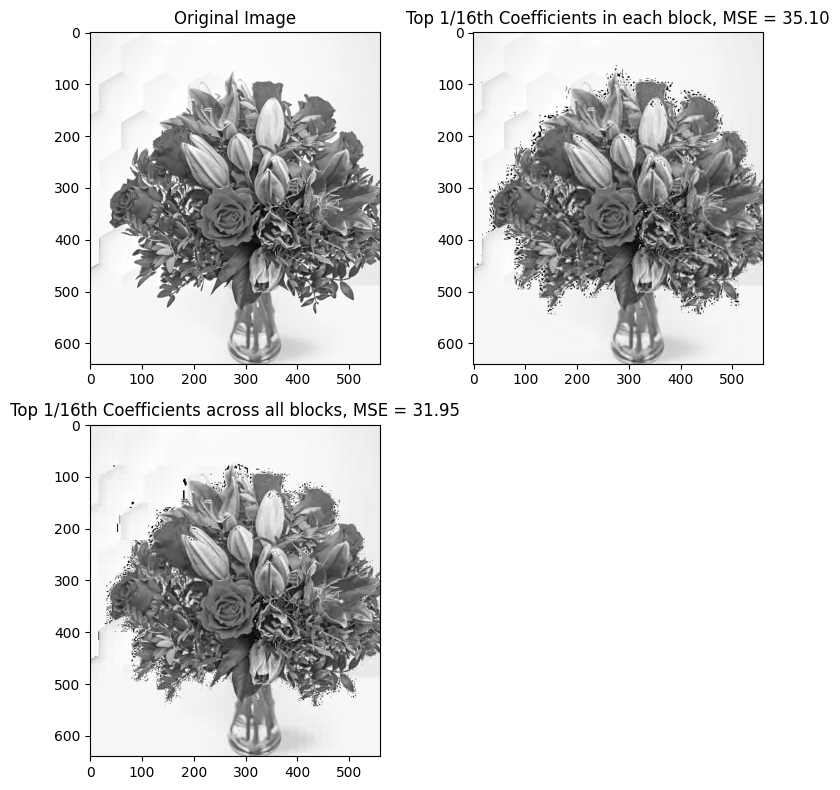

In [25]:

from scipy.fftpack import dct, idct

flower = cv2.imread("data/flower.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)

import numpy as np
from scipy.fftpack import dct, idct

def compute_dct_blocks(image: np.array, block_size=16) -> np.array:
    M, N = image.shape
    blocks = np.zeros((M // block_size, N // block_size, block_size, block_size))

    for i in range(0, M, block_size):
        for j in range(0, N, block_size):
            block = image[i:i + block_size, j:j + block_size]
            if block.shape[0] == block_size and block.shape[1] == block_size:
                dct_block = dct(dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')
                blocks[i // block_size, j // block_size] = dct_block  # Store DCT block

    return blocks

def reconstruct_image_top(blocks, block_size=16):
    M, N, _, _ = blocks.shape
    reconstructed_image = np.zeros((M * block_size, N * block_size))
    for i in range(M):
        for j in range(N):
            block = blocks[i, j]
            flattened_block = block.flatten()
            sorted_indices = np.argsort(np.abs(flattened_block))[::-1]

            threshold = len(flattened_block) // 16  # Calculate threshold for top 1/16 coefficients
            thresholded_dct = np.zeros_like(flattened_block)
            thresholded_dct[sorted_indices[:threshold]] = flattened_block[sorted_indices[:threshold]]

            thresholded_dct = thresholded_dct.reshape((block_size, block_size))
            reconstructed_block = idct(idct(thresholded_dct, axis=0, norm='ortho'), axis=1, norm='ortho')
            reconstructed_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = reconstructed_block
    return reconstructed_image


def reconstruct_image_global_top(blocks, block_size=16):
    M, N, _, _ = blocks.shape
    reconstructed_image = np.zeros((M * block_size, N * block_size))

    all_coefficients = np.concatenate([block.flatten() for block in blocks.reshape(-1, block_size, block_size)])
    threshold = len(all_coefficients) // 16
    sorted_indices = np.argsort(np.abs(all_coefficients))[::-1]
    top_coefficients_indices = sorted_indices[:threshold]
    
    thresholded_coefficients = np.zeros_like(all_coefficients)
    thresholded_coefficients[top_coefficients_indices] = all_coefficients[top_coefficients_indices]
    
    thresholded_blocks = thresholded_coefficients.reshape(M, N, block_size, block_size)

    for i in range(M):
        for j in range(N):
            thresholded_dct_block = thresholded_blocks[i, j]
            reconstructed_block = idct(idct(thresholded_dct_block, axis=0, norm='ortho'), axis=1, norm='ortho')
            reconstructed_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = reconstructed_block

    return reconstructed_image


dct_blocks = compute_dct_blocks(flower)

# # Top 1/16th coefficients in each block
C2_top = reconstruct_image_top(dct_blocks).astype(np.uint8)

C1 = flower.astype(np.uint8)
dct_blocks = compute_dct_blocks(flower)

C2_global_uint8 = (reconstruct_image_global_top(dct_blocks)).astype(np.uint8)

MSE_top = np.mean((C1 - C2_top) ** 2)
MSE_global = np.mean((C1 - C2_global_uint8) ** 2)
print("MSE of top 1/16th for each block : ",MSE_top)
print("MSE of top 1/16  across all  block : ",MSE_global)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(C1, cmap='gray')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.title("Top 1/16th Coefficients in each block, MSE = {:.2f}".format(MSE_top))
plt.imshow(C2_top, cmap='gray')
plt.axis('on')

plt.subplot(2, 2, 3)
plt.title("Top 1/16th Coefficients across all blocks, MSE = {:.2f}".format(MSE_global))
plt.imshow(C2_global_uint8, cmap='gray')
plt.axis('on')

plt.tight_layout()
plt.savefig("output_images/Q1/partd.png")
plt.show()


In [53]:
Z =C2_top.astype(np.uint8)

In [55]:
np.average(np.square(Z-flower.astype(np.uint8)))

12581624